In [1]:
from collections import Counter
from datetime import datetime
import math as mt
import sqlite3
import os
import re

from matplotlib import pyplot as plt
import pandas as pd

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-2])
DATA_PATH = f'{ROOT_PATH}/TIL/Dataset/DOODLE'
DATA_PATH

'/home/dove/TIL/Dataset/DOODLE'

In [3]:
class DB:

    def __init__(self, db_path):
        self.conn, self.cursor = self.connect_db(db_path)

    
    def connect_db(self, db_path):

        conn   = sqlite3.connect(db_path)
        cursor = conn.cursor
    
        return conn, cursor

    
    def select(self, table, column = '*', cond = None, order = None):

        query  = f'select distinct {column} from {table} '
        query += f'where {cond} ' if cond else ' '
        query += f'order by {order} ' if order else ' '

        print(f'QUERY : {query}')
        df     = pd.read_sql(sql = query, con = self.conn)
        return df


    def close_db(self):
        self.conn.commit()
        self.conn.close()


def show_text_in_graph (plot, dates, counts, lb = 'visit'): 
    for date, cnt in zip(dates, counts): 
        
        plot.text(date, cnt + 50 if lb == 'visit' else cnt, cnt, ha = 'center', va = 'bottom')


def get_dates_n_counts(column):

    date_n_cnt = dict(merge_cp[column].value_counts())
    date_n_cnt = sorted(date_n_cnt.items(), key = lambda x: x[0])

    dates  = [data[0] for data in date_n_cnt]
    counts = [data[1] for data in date_n_cnt]

    return dates, counts
    

def preprop4title(title):

    sub_dict = { 
                'stack overflow'    : 'Stack Overflow',
                'at main'           :         'Github',
                'evodmik'           :         'Github',
                'kaggle'            :         'Kaggle',
                'gmail'             :          'Gmail',
                'confirm access'    :         'Github',
                'youtube'           :        'Youtube',
                'dove-nest'         :            'NAS',
                'pull request'      :         'Github',
                'device activation' :         'Github',
                'google'            :         'Google',
                'image library'     :         'Docker',
                'flir'              :         'Github',
                'pyimagesearch'     :  'Pyimagesearch',
                'misc'              :           'Misc',
                'code-server'       :    'Code Server',
                'confluence'        :     'Confluence',
                'laion'             :          'LAION',
                'lucidrains'        :         'Github',
                'showlab'           :         'Github',
                '네이버'              :          'Naver',
                'jupyterlab'        :     'JupyterLab',
                '나무위키'            :       'NamuWiki',
                'wiseodd/'          :         'Github',
                
               } 

    for key in sub_dict.keys():
        if key in title.lower():
            title = title.replace(title, sub_dict[key])
            return title

    return sub_dict['misc']

In [4]:
## 방문 기록은 sqlite을 통해 불러올 수 있다.
db = DB(f'{DATA_PATH}/HistoryC')

In [5]:
df = db.select(column = 'name', table = 'sqlite_master',
               cond   = 'type = "table"')
df.head()

QUERY : select distinct name from sqlite_master where type = "table"  


,name
0,meta
1,downloads
2,downloads_url_chains
3,downloads_slices
4,typed_url_sync_metadata


In [6]:
visits = db.select(table = 'visits')
visits.sample(3).T

QUERY : select distinct * from visits   


,3130,341,8833
id,3132,342,8850
url,2218,1722,1866
visit_time,13339470765185629,13339132568050197,13340852206946122
from_visit,3131,0,0
transition,805306375,805306368,822083584
segment_id,0,0,0
visit_duration,522425,4629,98830
incremented_omnibox_typed_score,0,0,0
opener_visit,0,341,0
originator_cache_guid,,,


In [7]:
urls  = db.select(table = 'urls')
urls.sample(3).T

QUERY : select distinct * from urls   


,2963,4053,1797
id,2964,4054,1798
url,https://www.google.com/search?source=hp&ei=xzL...,https://murf.ai/?lmref=oW5IkA,http://121.160.102.68:8888/lab/workspaces/auto...
title,홀수 - Google 검색,AI Voice Generator: Versatile Text to Speech S...,JupyterLab (auto-9)
visit_count,2,1,4
typed_count,0,0,0
last_visit_time,13339668658500263,13340185879210331,13339141968379223
hidden,0,0,0


In [8]:
visits = visits.rename(columns = {'url' : 'uId'}) 
urls   = urls.rename(columns   = {'id'  : 'uId'})

merge  = pd.merge(visits, urls, how = 'left', on = 'uId')
merge.sample(3).T

,8552,13451,11560
id,8569,13476,11582
uId,4352,3268,1722
visit_time,13340264962841779,13341572955964798,13341395699644331
from_visit,0,0,0
transition,805306368,805306368,805306368
segment_id,0,0,0
visit_duration,8964741,20475751,283545271
incremented_omnibox_typed_score,0,0,0
opener_visit,8568,13475,11581
originator_cache_guid,,,


In [9]:
## Chrome 베이스 브라우저인 웨일은 1601년 1월 1일 이후 경과한 시간을 마이크로초 단위로 나타냄.
## Unix 시간과 11,644,473,600 초가 차이나 1,000,000으로 나누고, 11,644,473,600을 빼줘야
## 제대로 된 시간이 표시됨.
converted = datetime.fromtimestamp(merge.visit_time[0] / 1_000_000 - 11_644_473_600)
datetime.strftime(converted, '%Y-%m-%d')

'2023-09-14'

In [10]:
chrome2unix           = lambda x: datetime.fromtimestamp(x / 1_000_000 - 11_644_473_600)
merge.visit_time      = merge.visit_time.apply(lambda x: datetime.strftime(chrome2unix(x), '%Y-%m-%d'))
merge.last_visit_time = merge.last_visit_time.apply(lambda x: datetime.strftime(chrome2unix(x), '%Y-%m-%d'))

In [11]:
drop_columns = [
                    'transition', 'segment_id', 'visit_duration',
                    'incremented_omnibox_typed_score', 'from_visit', 'originator_cache_guid',
                    'originator_visit_id', 'originator_from_visit', 'originator_opener_visit',
                    'is_known_to_sync', 'typed_count', 'hidden'
                ]
merge        = merge.drop(drop_columns, axis = 1)
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14510 entries, 0 to 14509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               14510 non-null  int64 
 1   uId              14510 non-null  int64 
 2   visit_time       14510 non-null  object
 3   opener_visit     14510 non-null  int64 
 4   url              14510 non-null  object
 5   title            14510 non-null  object
 6   visit_count      14510 non-null  int64 
 7   last_visit_time  14510 non-null  object
dtypes: int64(4), object(4)
memory usage: 907.0+ KB


In [12]:
merge.sample(3).T

,13729,1399,11264
id,13754,1400,11286
uId,6098,1722,5374
visit_time,2023-10-13,2023-09-14,2023-10-10
opener_visit,0,1399,0
url,https://beeny-ds.tistory.com/18,https://laion.ai/blog/laion-400-open-dataset/,https://wandb.auth0.com/authorize?client_id=VS...
title,[Package] 파이썬 코드 패키지화 → setup.py,LAION-400-MILLION OPEN DATASET | LAION,로그인 - Google 계정
visit_count,4,1856,1
last_visit_time,2023-10-13,2023-10-10,2023-10-10


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'JupyterLab'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'LAION'),
  Text(4, 0, 'Github'),
  Text(5, 0, 'Kaggle'),
  Text(6, 0, 'Naver'),
  Text(7, 0, 'Confluence'),
  Text(8, 0, 'Gmail'),
  Text(9, 0, 'NamuWiki'),
  Text(10, 0, 'Code Server'),
  Text(11, 0, 'Stack Overflow'),
  Text(12, 0, 'Youtube'),
  Text(13, 0, 'NAS'),
  Text(14, 0, 'Pyimagesearch'),
  Text(15, 0, 'Docker')])

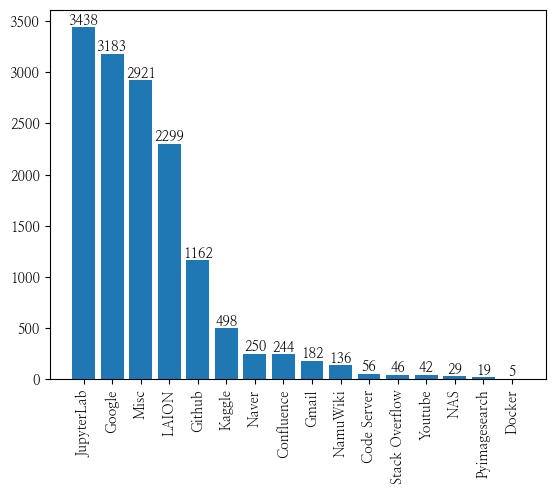

In [13]:
merge_cp       = merge.copy()
merge_cp.title = merge_cp.title.apply(lambda x : preprop4title(x))
title_cnt      = dict(merge_cp.title.value_counts())

plt.bar(title_cnt.keys(), title_cnt.values())
for k, v in title_cnt.items():

    plt.text(k, v, v,
             ha = 'center', va = 'bottom')

plt.xticks(rotation = 90)

In [14]:
titles          = merge.title.unique()
title_visit_cnt = {title : 0 for title in titles}

for title in titles:

    values = set(merge[merge.title == title].visit_count.values)
    for value in values: title_visit_cnt[title] += value


sorted_cnt = sorted(title_visit_cnt.items(), key = lambda x: x[1], reverse = True)
sorted_cnt = dict([(key, value) for (key, value) in sorted_cnt
                   if value >= 20])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, 'LAION-400-MILLION OPEN DATASET | LAION'),
  Text(1, 0, 'JupyterLab (auto-r)'),
  Text(2, 0, 'JupyterLab'),
  Text(3, 0, 'LAION-AI/phenaki: A phenaki reproduction using pytorch.'),
  Text(4, 0, 'train_maskgi… - JupyterLab'),
  Text(5, 0, 'Device Activation'),
  Text(6, 0, 'train.ipynb - JupyterLab'),
  Text(7, 0, 'test_vivq.ipynb (3) - JupyterLab'),
  Text(8, 0, 'Issues · LAION-AI/phenaki'),
  Text(9, 0, 'Find Open Datasets and Machine Learning Projects | Kaggle'),
  Text(10, 0, 'train_cvivit… (auto-V) - JupyterLab'),
  Text(11, 0, 'JupyterLab (auto-N)'),
  Text(12, 0, 'EvoDmiK/TIL: Today I Learn'),
  Text(13, 0, 'Kaggle: Your Home for Data Scien

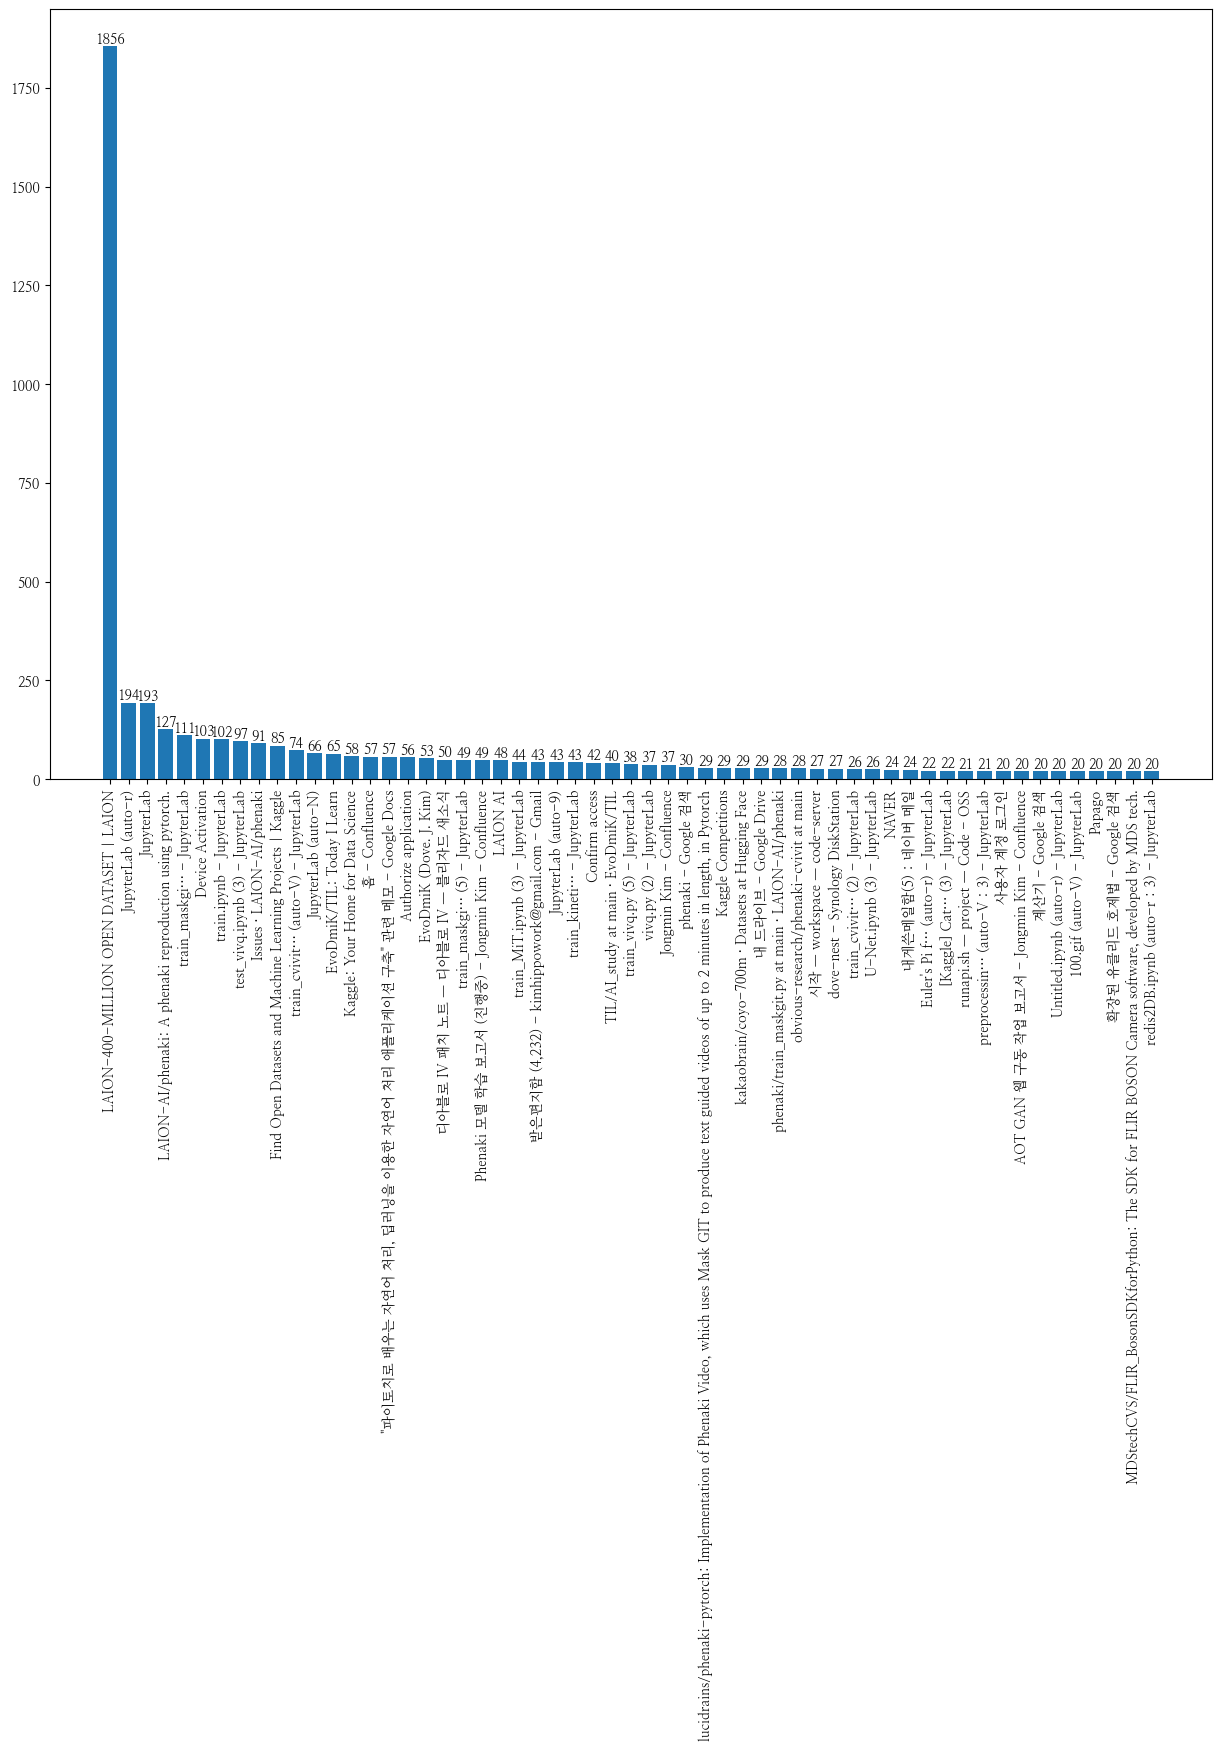

In [15]:
plt.figure(figsize = (15, 10))
plt.bar(sorted_cnt.keys(), sorted_cnt.values())

for k, v in sorted_cnt.items():

    plt.text(k, v, v,
             ha = 'center', va = 'bottom')

plt.xticks(rotation = 90)

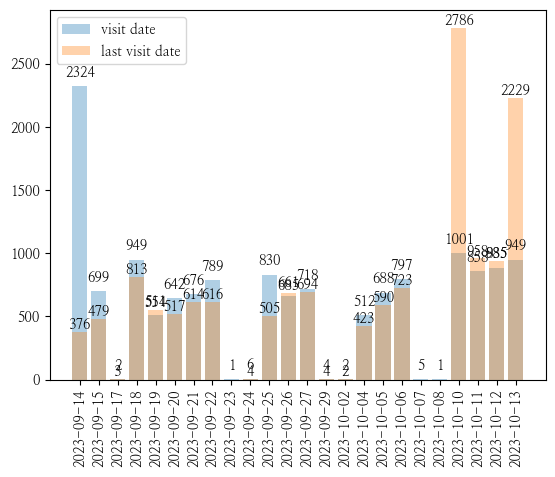

In [16]:
dates     , counts      = get_dates_n_counts(     'visit_time')
last_dates, last_counts = get_dates_n_counts('last_visit_time') 

plt.bar(dates     ,      counts, alpha = 0.35, label =      'visit date')
plt.bar(last_dates, last_counts, alpha = 0.35, label = 'last visit date')

show_text_in_graph(plt, dates, counts)
show_text_in_graph(plt, last_dates, last_counts, lb = 'last')
plt.xticks(rotation = 90)
plt.legend()

### 99. 참고자료
#### 99-1. 웹 페이지
- [[네이버 웨일 방문기록 다운로드 하기]](https://forum.whale.naver.com/topic/30147/)